### Students Performance Project

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pz

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#####  1.Load the dataset

In [29]:
data  = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(data)

##### 2. Inspect the data

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


##### 3. Clean the dataset

- If any columns are irrelevant to analysis, drop them

In [14]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
287,female,group B,some high school,standard,none,67,89,82
920,male,group D,high school,free/reduced,none,69,70,67
886,female,group E,associate's degree,standard,completed,93,100,95
238,male,group B,some college,standard,none,54,52,51
342,female,group B,high school,standard,completed,69,76,74


- If there are missing values, handle them (drop or fill with mean/mode).

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

- Encode the following categorical variables

In [99]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["gender", "race/ethnicity", "lunch"])

In [100]:
# Ordinal Encoding
education_order = {
    "some high school": 0,
    "high school": 1,
    "some college": 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5,
}

df_encoded["parental level of education"] = df_encoded[
    "parental level of education"
].map(education_order)

In [101]:
# Ordinal Encoding
df_encoded["test preparation course"] = df_encoded["test preparation course"].map(
    {"none": 0, "completed": 1}
)

In [102]:
df_encoded.head()

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,4,0,72,72,74,True,False,False,True,False,False,False,False,True
1,2,1,69,90,88,True,False,False,False,True,False,False,False,True
2,5,0,90,95,93,True,False,False,True,False,False,False,False,True
3,3,0,47,57,44,False,True,True,False,False,False,False,True,False
4,2,0,76,78,75,False,True,False,False,True,False,False,False,True


##### 4. Apply normalization

In [81]:
df_encoded.sample(5)

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
804,2,0,73,76,78,True,False,False,False,True,False,False,False,True
137,1,0,70,55,56,False,True,False,False,False,False,True,False,True
236,4,0,63,66,67,False,True,False,False,False,True,False,True,False
749,2,1,87,84,86,False,True,False,True,False,False,False,False,True
826,3,1,56,68,70,True,False,False,False,True,False,False,True,False


In [106]:
numerical_columns = df_encoded.select_dtypes(include=["int64", "float64"]).columns

In [107]:
numerical_columns

Index(['parental level of education', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

In [108]:
numerical_columns = numerical_columns.drop(
    ["parental level of education", "test preparation course"]
)

In [85]:
numerical_columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [86]:
scaler = MinMaxScaler()

In [109]:
for col in numerical_columns:
    df_encoded[col] = scaler.fit_transform(df_encoded[[col]])

In [ ]:
df_encoded.sample(5)

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
967,2,0,0.63,0.554217,0.555556,False,True,False,False,True,False,False,False,True
815,0,1,0.94,0.831325,0.855556,False,True,False,True,False,False,False,False,True
693,3,0,0.77,0.722892,0.700000,True,False,False,False,False,True,False,False,True
408,1,1,0.52,0.481928,0.511111,True,False,False,False,False,True,False,True,False
83,3,0,0.72,0.566265,0.588889,False,True,False,False,False,False,True,False,True


In [112]:
for col in numerical_columns:
    df_encoded[col] = df_encoded[col].round(2)

In [119]:
df_encoded.sample(5)

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
332,3,1,0.62,0.47,0.48,False,True,False,False,False,False,True,False,True
826,3,1,0.56,0.61,0.67,True,False,False,False,True,False,False,True,False
46,3,1,0.55,0.58,0.58,True,False,True,False,False,False,False,False,True
558,3,0,0.53,0.64,0.67,True,False,False,True,False,False,False,True,False
62,3,0,0.62,0.53,0.50,False,True,True,False,False,False,False,True,False


##### 5. Descriptive Statistics Report

In [ ]:
# After Normalization
for col in numerical_columns:
    print(col.title())
    print(
        "Mean: ",
        df_encoded[col].mean(),
        "Median: ",
        df_encoded[col].median(),
        "Standard Deviation: ",
        df_encoded[col].std(),
        "Min: ",
        df_encoded[col].min(),
        "Max: ",
        df_encoded[col].max(),
    )
    print("-"*20)

Math Score
Mean:  0.66089 Median:  0.66 Standard Deviation:  0.15163080096009451 Min:  0.0 Max:  1.0
--------------------
Reading Score
Mean:  0.62827 Median:  0.64 Standard Deviation:  0.1759456278625984 Min:  0.0 Max:  1.0
--------------------
Writing Score
Mean:  0.6451399999999999 Median:  0.66 Standard Deviation:  0.16869747846141397 Min:  0.0 Max:  1.0
--------------------


In [129]:
# Before Normalization
for col in numerical_columns:
    print(col.title())
    print(
        "Mean: ",
        df[col].mean(),
        "Median: ",
        df[col].median(),
        "Standard Deviation: ",
        df[col].std(),
        "Min: ",
        df[col].min(),
        "Max: ",
        df[col].max(),
    )
    print("-" * 20)

Math Score
Mean:  66.089 Median:  66.0 Standard Deviation:  15.16308009600945 Min:  0 Max:  100
--------------------
Reading Score
Mean:  69.169 Median:  70.0 Standard Deviation:  14.600191937252216 Min:  17 Max:  100
--------------------
Writing Score
Mean:  68.054 Median:  69.0 Standard Deviation:  15.19565701086965 Min:  10 Max:  100
--------------------


- Plot a boxplot and histogram for each score.


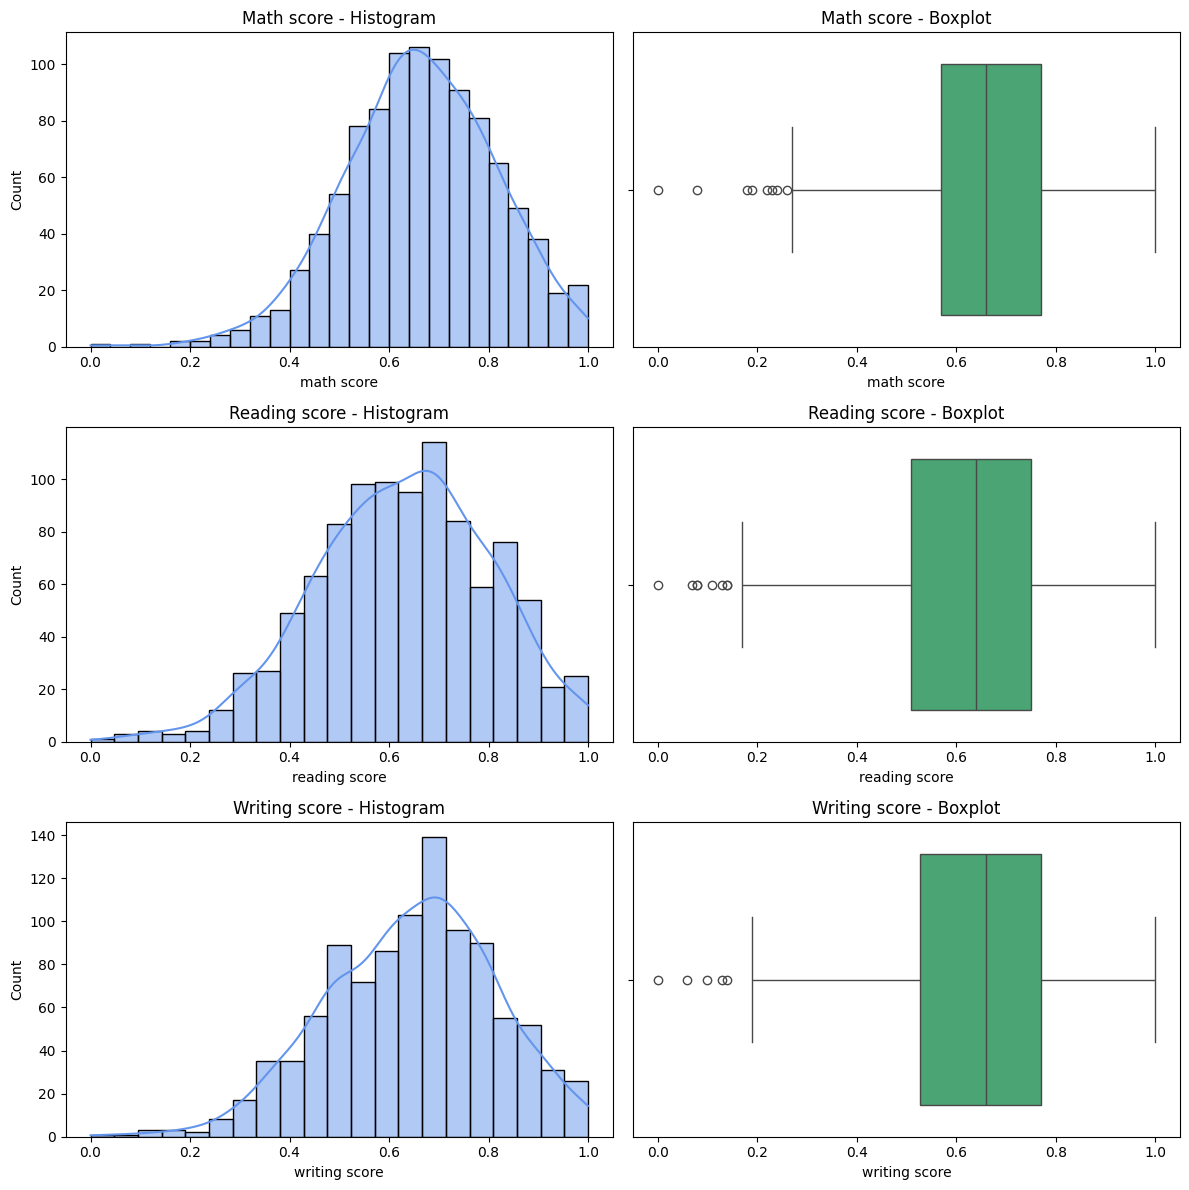

In [ ]:
fig, axes = plt.subplots(
    nrows=len(numerical_columns), ncols=2, figsize=(12, 4 * len(numerical_columns))
)

for i, score in enumerate(numerical_columns):
    sns.histplot(
        data=df_encoded, x=score, kde=True, color="cornflowerblue", ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"{score.capitalize()} - Histogram")

    sns.boxplot(data=df_encoded, x=score, color="mediumseagreen", ax=axes[i, 1])
    axes[i, 1].set_title(f"{score.capitalize()} - Boxplot")

plt.tight_layout()
plt.show()

##### 6. Bonus Task (optional):

In [136]:
df_encoded["average_score"] = df_encoded[
    ["math score", "reading score", "writing score"]
].mean(axis=1)

In [137]:
df_encoded

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,average_score
0,4,0,0.72,0.66,0.71,True,False,False,True,False,False,False,False,True,0.696667
1,2,1,0.69,0.88,0.87,True,False,False,False,True,False,False,False,True,0.813333
2,5,0,0.90,0.94,0.92,True,False,False,True,False,False,False,False,True,0.920000
3,3,0,0.47,0.48,0.38,False,True,True,False,False,False,False,True,False,0.443333
4,2,0,0.76,0.73,0.72,False,True,False,False,True,False,False,False,True,0.736667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,1,0.88,0.99,0.94,True,False,False,False,False,False,True,False,True,0.936667
996,1,0,0.62,0.46,0.50,False,True,False,False,True,False,False,True,False,0.526667
997,1,1,0.59,0.65,0.61,True,False,False,False,True,False,False,True,False,0.616667
998,2,1,0.68,0.73,0.74,True,False,False,False,False,True,False,False,True,0.716667


In [138]:
df_encoded["average_score"] = df_encoded["average_score"].round(2)

In [145]:
def classify_performance(score):
    if score >= .80:
        return "High"
    elif score >= .60:
        return "Medium"
    else:
        return "Low"

In [146]:
df_encoded["performance_level"] = df_encoded["average_score"].apply(
    classify_performance
)

In [147]:
df_encoded.sample(5)

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,average_score,performance_level
970,4,0,0.89,1.00,1.00,True,False,False,False,False,True,False,False,True,0.96,High
644,1,0,0.70,0.58,0.56,False,True,False,True,False,False,False,False,True,0.61,Medium
406,3,1,0.65,0.58,0.59,False,True,False,True,False,False,False,False,True,0.61,Medium
23,0,0,0.69,0.67,0.70,True,False,False,False,True,False,False,False,True,0.69,Medium
525,2,0,0.68,0.52,0.54,False,True,False,False,False,False,True,False,True,0.58,Low


In [148]:
df_encoded.to_csv("students_cleaned.csv", index=False)

#### Reflection Questions (Write in a Markdown cell):

Q1: What are the main insights you noticed from the score distributions?
- Reading and writing scores tend to be slightly higher and more consistent than math.
- Most students score between 60–80, making “Medium” the largest group.
- Distribution is slightly right-skewed for math (more lower scores).

Q2: Were there any surprising patterns or outliers?
- Some students scored very low (<30) in math while still scoring higher in writing/reading — a possible outlier.
- High scorers (90+) are rare and tend to cluster together across all three subjects.

Q3: How did normalization change the values?
- All values scale between 0 and 1.